## Importamos librerias

In [ ]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

## Funciones

In [ ]:
def creacion_modelo(modelo, X, y, escalado, metrica):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

  if escalado == 'MinMax':
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
  if escalado == 'scaler':
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)

  model = modelo
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  if metrica == 'f1':
    f1 = ((f1_score(y_test, y_pred))*100).round(2)
    print('El f1 para este modelo es {}%'.format(f1))
  if metrica == 'accuracy':
    accuracy = (accuracy_score(y_test, y_pred))*100
    print('El accuracy para este modelo es {}%'.format(accuracy.round(2)))

In [ ]:
def optimizacion_parametros(modelo, parametros, cv, escalado):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

  if escalado == 'MinMax':
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
  if escalado == 'scaler':
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)

  LogSearch = GridSearchCV(estimator=modelo, param_grid=parametros, cv=cv)
  LogSearch.fit(X_train, y_train)

  print("Mejores hiperparámetros encontrados:")
  print(LogSearch.best_params_)

  print("Puntuación de validación cruzada media asociada a los mejores hiperparámetros:")
  print(LogSearch.best_score_)

## Analisis exploratorio

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Dataset_Modeling/Hotel Reservations.csv')

In [ ]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [ ]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [ ]:
df['type_of_meal_plan'].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [ ]:
df['room_type_reserved'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [ ]:
df['market_segment_type'].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [ ]:
df['booking_status'].unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

In [ ]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


array([[<AxesSubplot:title={'center':'no_of_adults'}>,
        <AxesSubplot:title={'center':'no_of_children'}>,
        <AxesSubplot:title={'center':'no_of_weekend_nights'}>,
        <AxesSubplot:title={'center':'no_of_week_nights'}>],
       [<AxesSubplot:title={'center':'required_car_parking_space'}>,
        <AxesSubplot:title={'center':'lead_time'}>,
        <AxesSubplot:title={'center':'arrival_year'}>,
        <AxesSubplot:title={'center':'arrival_month'}>],
       [<AxesSubplot:title={'center':'arrival_date'}>,
        <AxesSubplot:title={'center':'repeated_guest'}>,
        <AxesSubplot:title={'center':'no_of_previous_cancellations'}>,
        <AxesSubplot:title={'center':'no_of_previous_bookings_not_canceled'}>],
       [<AxesSubplot:title={'center':'avg_price_per_room'}>,
        <AxesSubplot:title={'center':'no_of_special_requests'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

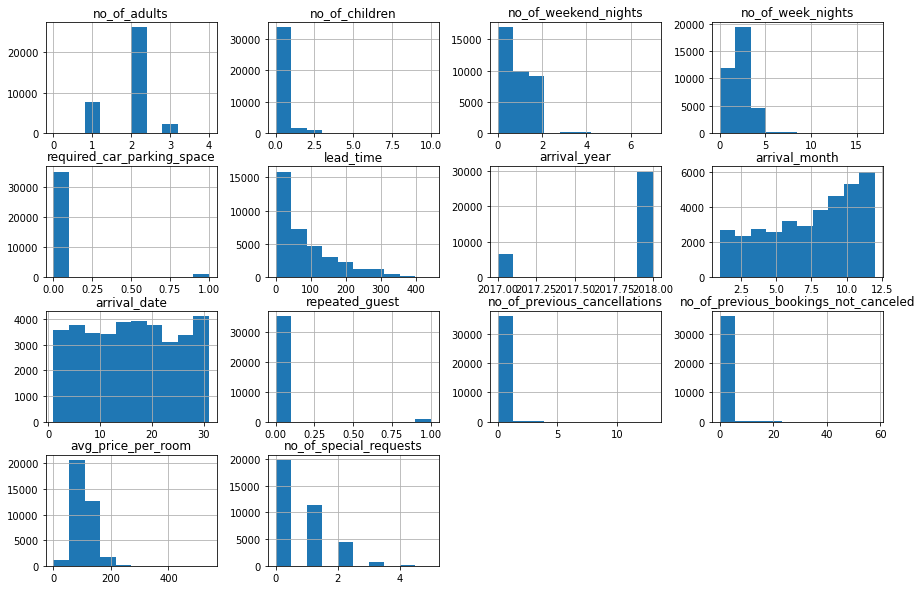

In [ ]:
df.hist(figsize = (15,10))

In [ ]:
df['no_of_children'].unique()

array([ 0,  2,  1,  3, 10,  9])

In [ ]:
df['no_of_week_nights'].unique()

array([ 2,  3,  1,  4,  5,  0, 10,  6, 11,  7, 15,  9, 13,  8, 14, 12, 17,
       16])

<AxesSubplot:>

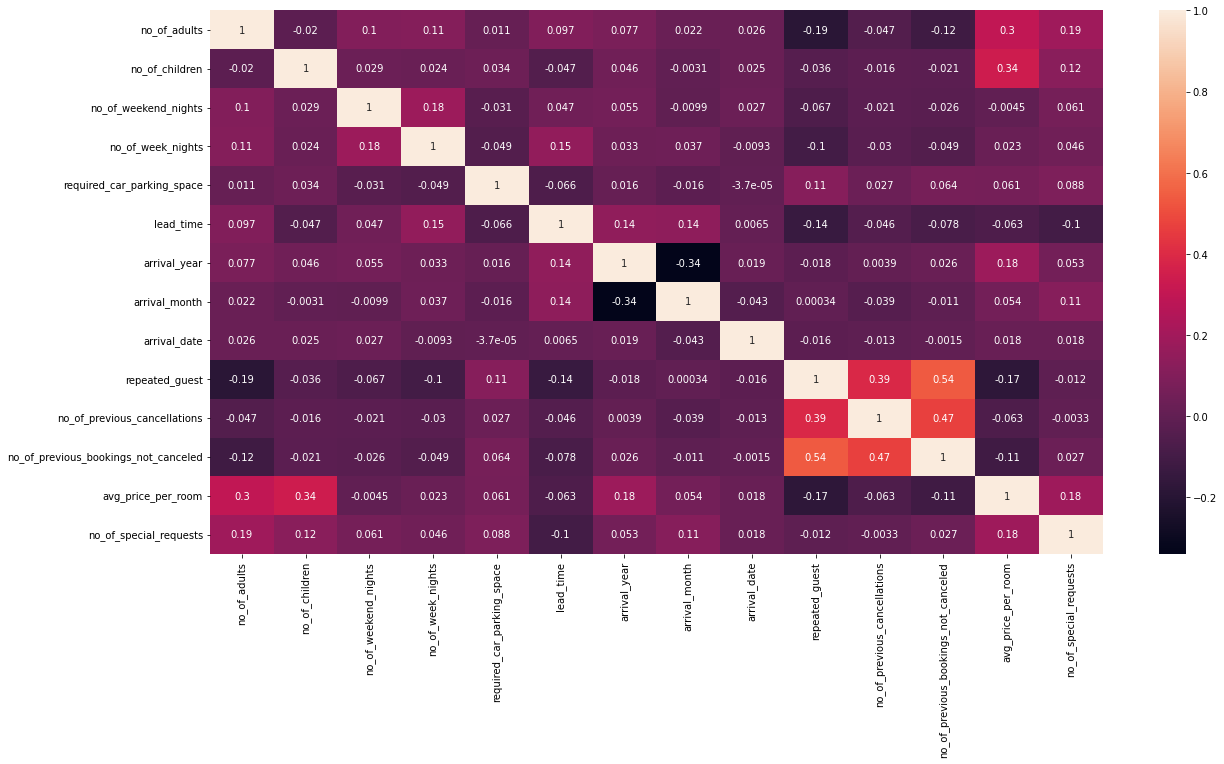

In [ ]:
correlations = df.corr()
f, ax = plt.subplots(figsize = (20,10))
sns.heatmap(correlations, annot = True)

In [ ]:
df_dummies = pd.get_dummies(df, columns=['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status'])
#df_dummies = df_dummies.drop(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status'], axis = 1)
df_dummies = df_dummies.drop(['booking_status_Not_Canceled'], axis = 1)
df_dummies.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,...,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status_Canceled
0,INN00001,2,0,1,2,0,224,2017,10,2,...,0,0,0,0,0,0,0,1,0,0
1,INN00002,2,0,2,3,0,5,2018,11,6,...,0,0,0,0,0,0,0,0,1,0
2,INN00003,1,0,2,1,0,1,2018,2,28,...,0,0,0,0,0,0,0,0,1,1
3,INN00004,2,0,0,2,0,211,2018,5,20,...,0,0,0,0,0,0,0,0,1,1
4,INN00005,2,0,1,1,0,48,2018,4,11,...,0,0,0,0,0,0,0,0,1,1


In [ ]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [ ]:
df_dummies.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests',
       'type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected',
       'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Aviation',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online',
       'booking_status_Canceled'],
      dtype='obje

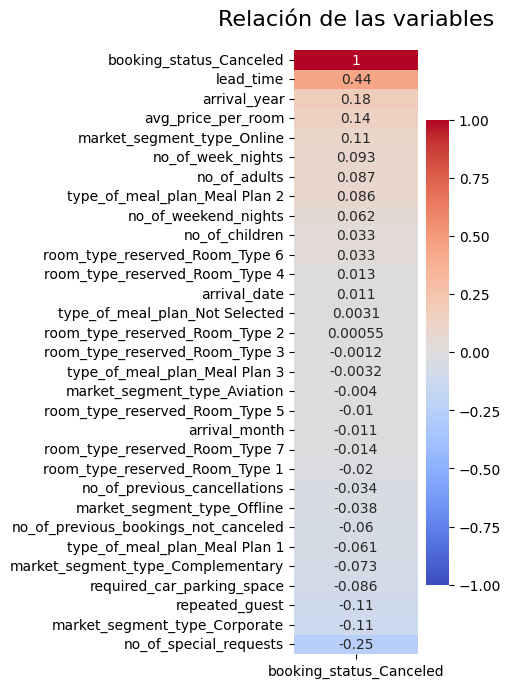

In [ ]:
plt.figure (figsize = (2 , 8) , dpi = 100)
heatmap = sns.heatmap (df_dummies.corr()[['booking_status_Canceled']].sort_values (by = 'booking_status_Canceled', ascending = False), vmin = -1, vmax = 1, annot = True, cmap = 'coolwarm')
heatmap.set_title ('Relación de las variables', fontdict = {'fontsize':16} , pad = 18);

Nos quedamos con las más relevantes

In [ ]:
df_filtered = df_dummies[['lead_time', 'arrival_year', 'avg_price_per_room', 'market_segment_type_Online', 'repeated_guest', 'market_segment_type_Corporate', 'no_of_special_requests', 'booking_status_Canceled']]

<AxesSubplot:>

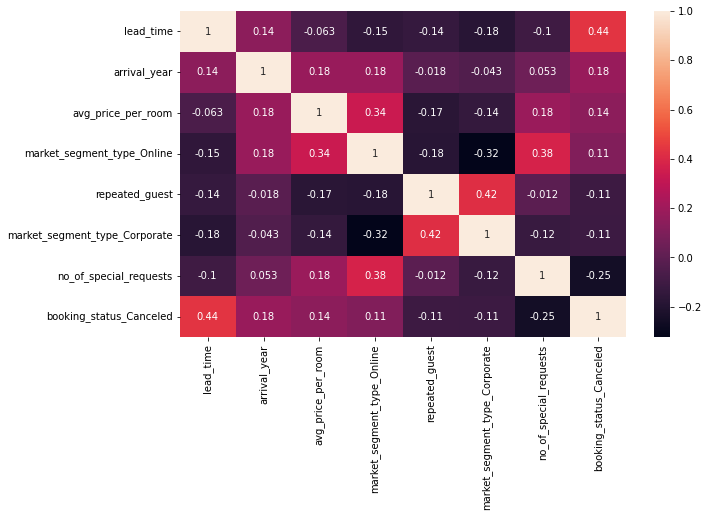

In [ ]:
correlations = df_filtered.corr()
f, ax = plt.subplots(figsize = (10,6))
sns.heatmap(correlations, annot = True)

In [ ]:
print('La muestra tiene {}% de positivos'.format(((y.sum()/y.shape[0])*100).round(2)))

La muestra tiene 32.76% de positivos


Existe una muestra desvalanceada de los datos por lo tanto no usaremos el accuracy si no deberemos usar el f1-score

## MODELiZACIÓN

Regresion logistica

In [ ]:
X = df_filtered.drop(['booking_status_Canceled'], axis = 1)
y = df_filtered['booking_status_Canceled']
creacion_modelo(LogisticRegression(), X, y, 'scaler', 'f1')

El f1 para este modelo es 67.09%


In [ ]:
parametros = {'C': [0.1, 1.0, 10.0], 'penalty': ['l1', 'l2']}
optimizacion_parametros(LogisticRegression(), parametros, 10, 'scaler')

Mejores hiperparámetros encontrados:
{'C': 1.0, 'penalty': 'l2'}
Puntuación de validación cruzada media asociada a los mejores hiperparámetros:
0.8019297036526533


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver l

In [ ]:
X = df_filtered.drop(['booking_status_Canceled'], axis = 1)
y = df_filtered['booking_status_Canceled']
creacion_modelo(LogisticRegression(C=1.0, penalty='l2'), X, y, 'scaler', 'f1')

El f1 para este modelo es 67.09%


In [ ]:
#Con todas las variables
X_all = df_dummies.drop(['booking_status_Canceled', 'Booking_ID'], axis = 1)
y_all = df_dummies['booking_status_Canceled']
creacion_modelo(LogisticRegression(C=1.0, penalty='l2'), X_all, y_all, 'scaler', 'f1')

El f1 para este modelo es 67.59%


Arbol de decision

In [ ]:
X = df_filtered.drop(['booking_status_Canceled'], axis = 1)
y = df_filtered['booking_status_Canceled']
creacion_modelo(DecisionTreeClassifier(), X, y, 'scaler', 'f1')

El f1 para este modelo es 67.02%


In [ ]:
#Con todas las variables
X_all = df_dummies.drop(['booking_status_Canceled', 'Booking_ID'], axis = 1)
y_all = df_dummies['booking_status_Canceled']
creacion_modelo(DecisionTreeClassifier(), X_all, y_all, 'scaler', 'f1')

El f1 para este modelo es 77.59%
